# Definitions

In [1]:
from zenodoExplorer.zenexp  import ze

recIDs = [10835267, 10890165]
with open("api.key", "r") as keyFile:
    ACCESS_TOKEN = keyFile.readline().rstrip()

ze = ze(ACCESS_TOKEN, recIDs)

In [2]:
ze.read_zdb()
ze.zdb.del_dat_tree('td2@10835267')
ze.zdb.del_dat_tree('ml1@10835267')
ze.zdb.plot()

In [3]:
ze.zdb.to_pd('TrainData')

,at_conf,ab_init_code,ab_init_theo
tag,,,
td1@10835267,ac1@10835267,CASTEP,PBE-D2
td1@10890165,ac1@10835267,CASTEP (ASE+LAMMPS),PBE-D2 (-fixed charge baseline)


In [4]:
ze.zdb.to_pd('MLIPs')

,tr_data,ml_code,ml_settings,fit_prop
tag,,,,
ml2@10835267,td1@10835267,GAP,"DTS, Rcut 3/6","energy, forces, virial"
ml1@10890165,td1@10835267,GAP,"DTS, Rcut 3/6 (seeds 1,2,3)","energy, forces, virial"
ml2@10890165,td1@10890165,GAP,"DTS, Rcut 3/6","energy, forces, virial"
ml3@10890165,td1@10835267,MACE,"Layers 2, Rcut 4+4","energy, forces, virial"
ml4@10890165,td1@10835267,MACE,"Layers 2, Rcut 6+6","energy, forces, virial"


In [5]:
ze.zdb.to_pd('MDSims')

,pes_model,md_code,md_system,md_no_at,md_ensmb,md_step,md_len,md_temp,md_pres
tag,,,,,,,,,
md1@10890165,ml2@10835267,LAMMPS,"33% EC:EMC (seeds 1,2,3)",640,"NPT, NVT",1.0 fs,0.6 ns,500 K,1 atm
md2@10890165,ml1@10890165,LAMMPS,33% EC:EMC,640,"NPT, NVT",1.0 fs,0.6 ns,500 K,1 atm
md3@10890165,ml2@10890165,LAMMPS,"33% EC:EMC (seeds 1,2,3)",640,"NPT, NVT",1.0 fs,1.0 ns,500 K,1 atm
md4@10890165,ml4@10890165,LAMMPS,33% EC:EMC,640,"NPT, NVT",1.0 fs,0.5 ns,500 K,1 atm
md5@10890165,ml3@10890165,LAMMPS,33% EC:EMC,640,"NPT, NVT",1.0 fs,0.9 ns,500 K,1 atm
md6@10890165,ml3@10890165,ASE,"33% EC:EMC (seeds 1,2,3)",640,"NPT, NVT",1.0 fs,0.9 ns,500 K,1 atm


In [6]:
import os
import glob
import numpy as np
from aseMolec import pltProps as pp

def get_all_thermo(fbase):
    dat = {}
    flist = np.sort(glob.glob('.cache/'+fbase+'/*.thermo'))
    for f in flist:
        aux = os.path.basename(f)
        key = os.path.splitext(aux)[0]
        dat.update({key: pp.loadtxttag(f)})
    return dat

dat1 = get_all_thermo('10712131/MDSims_1000Atoms_05fs_MACE_SD22NQ_wB97X')
dat2 = get_all_thermo('10712131/MDSims_1000Atoms_1fs_MACE_IBM23_B97')
dat3 = get_all_thermo('10712131/MDSims_1000Atoms_1fs_MACE_SD22NQ_B97')
dat4 = get_all_thermo('10835267/MDSims_1000Atoms_1000ps_300K_NPT_Gen16DTS_PBED3')

pp.rename_key(dat4, 'TimeStep', 'Time')
pp.rename_key(dat4, 'v_mdensity', 'Density')
pp.rename_key(dat4, 'c_compMSD[4]', 'MSD')

pp.convert_units(dat1, 'Time', 'ps', 0.001)
pp.convert_units(dat2, 'Time', 'ps', 0.001)
pp.convert_units(dat3, 'Time', 'ps', 0.001)
pp.convert_units(dat4, 'Time', 'ps', 0.001)

def_cols = ['tab:red', 'tab:orange', 'tab:green', 'tab:blue']
pp.convert_units(dat4, 'Density', 'g/cm$^3$', 1.0)
pp.convert_units(dat4, 'MSD', 'A$^2$', 1.0)


# Compare MD trajectories

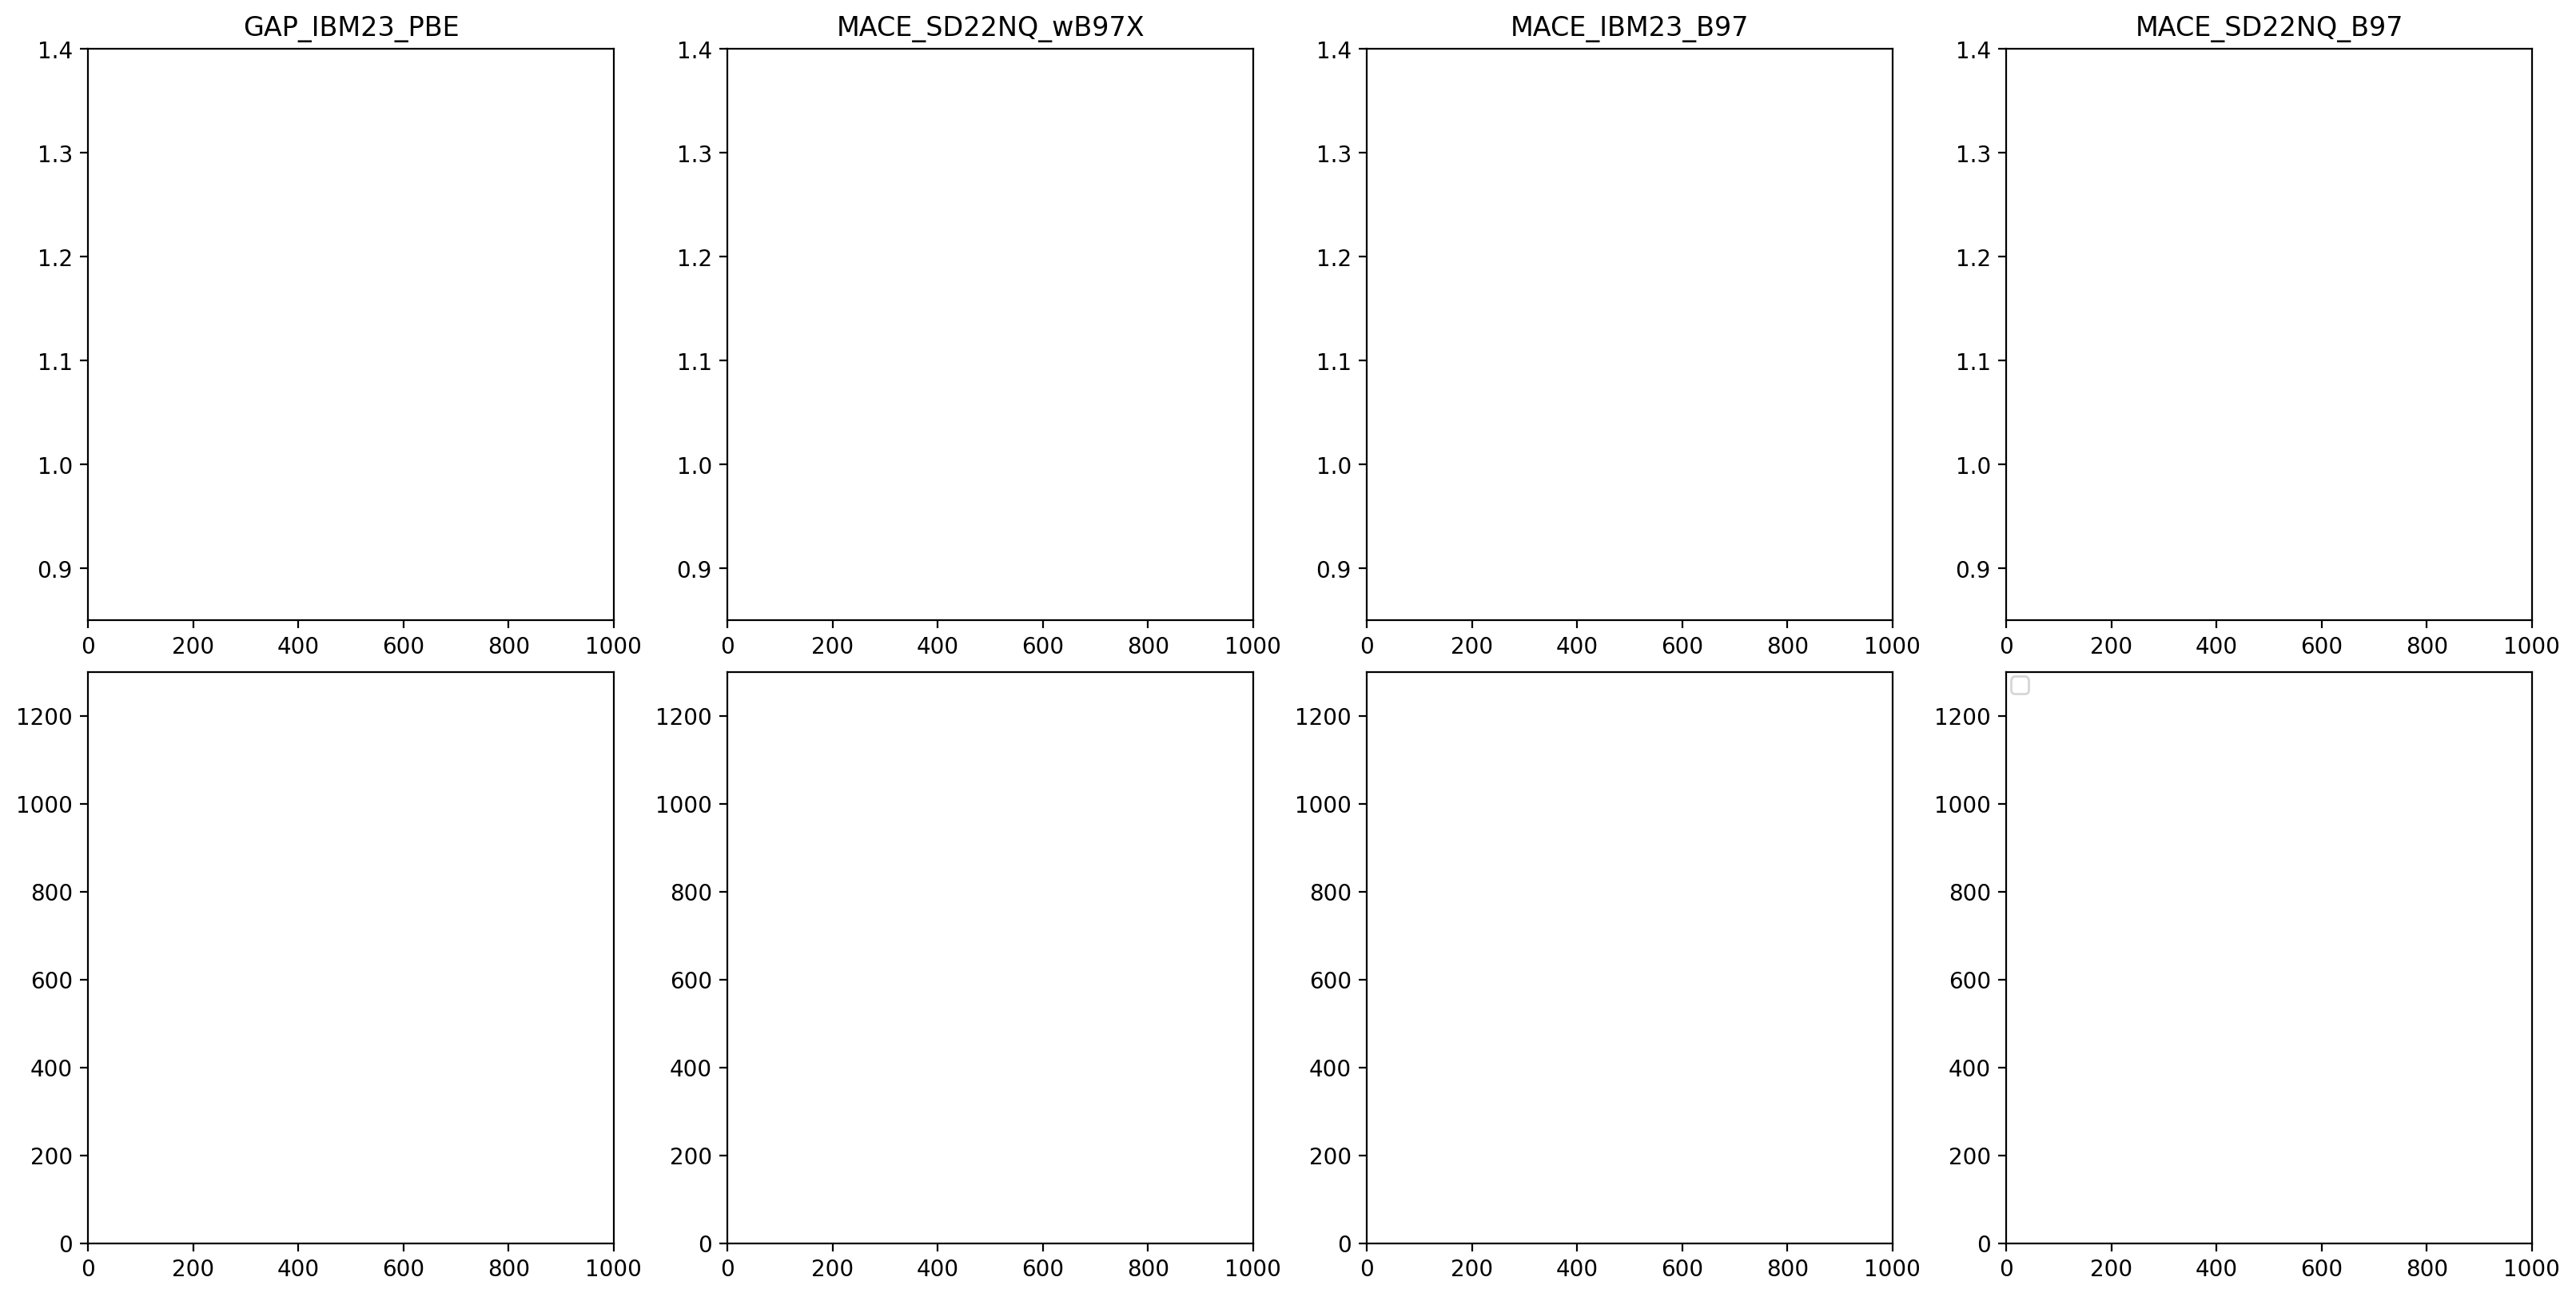

In [7]:
from matplotlib import pyplot as plt
from aseMolec import pltProps as pp
import ase.units
densfact = (ase.units.m/1.0e2)**3/ase.units.mol

fig, axes = plt.subplot_mosaic(mosaic='ABCD;EFGH', figsize=(16,8), dpi=200, layout='constrained')

# Density

plt.sca(axes['A'])
for i, k in enumerate(dat4):
    pp.simpleplot(dat4[k], 3, 4, color=def_cols[i])
plt.xlim([0,1000])
plt.ylim([0.85,1.4])
plt.title('GAP_IBM23_PBE')

plt.sca(axes['B'])
for k in dat1:
    pp.simpleplot(dat1[k], 0, 2)
plt.xlim([0,1000])
plt.ylim([0.85,1.4])
plt.title('MACE_SD22NQ_wB97X')

plt.sca(axes['C'])
for k in dat2:
    pp.simpleplot(dat2[k], 0, 2)
plt.xlim([0,1000])
plt.ylim([0.85,1.4])
plt.title('MACE_IBM23_B97')

plt.sca(axes['D'])
for k in dat3:
    pp.simpleplot(dat3[k], 0, 2)
plt.xlim([0,1000])
plt.ylim([0.85,1.4])
plt.title('MACE_SD22NQ_B97')

# Diffusivity

plt.sca(axes['E'])
for i, k in enumerate(dat4):
    pp.simpleplot(dat4[k], 3, 5, color=def_cols[i])
plt.xlim([0,1000])
plt.ylim([0,1300])

plt.sca(axes['F'])
for k in dat1:
    pp.simpleplot(dat1[k], 0, 5)
plt.xlim([0,1000])
plt.ylim([0,1300])

plt.sca(axes['G'])
for k in dat2:
    pp.simpleplot(dat2[k], 0, 5)
plt.xlim([0,1000])
plt.ylim([0,1300])

plt.sca(axes['H'])
for k in dat3:
    pp.simpleplot(dat3[k], 0, 5)
plt.xlim([0,1000])
plt.ylim([0,1300])

plt.legend(['298K EMC', '298K EC:EMC (3:7)', '298K EC:EMC (7:3)', '313K EC'], handlelength=1, loc='upper left', borderaxespad=0.2)
